# Assignment 3

## Jiewei Chen (999 494 235)

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


__Answer 1.1__

Import important modules

In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

Define a function ${\textit{df_category}}$ that works with any category. It takes a category of food as input and returns a data frame containing information needed.

In [4]:
def df_category (category):
    """
    this function takes a category as an input
    and 
    returns a Data Frame containing the "Fresh" row(s) from the Excel files under that category
    """
    # set working directory
    os.chdir('/Users/CJ/Dropbox/Course Winter 2017/STA 141B/HW/hw3/assignment3_data/'+ category)

    # list all excel files under this directory
    filelist = os.listdir()
    
    df_result = pd.DataFrame() 
    for item in filelist:
        # extracting information from each excel
        dftemp = extract_info(item)
        # add two columns - one is type, which equals to the category, for example, "fruit"
        #                   the other is food, for example, "apple"
        dftemp['type'], dftemp['food'] = pd.Series([category, item[:-5]])
        
        # append new information to the dataframe
        df_result = df_result.append(dftemp)
        
    return df_result

Define a function ${\textit{extract_info}}$ that works with one excel file. It takes the name of one food as input and returns a data frame containing information needed by reading the corresponding excel file.

In [5]:
def extract_info (food):
    """
    this function takes a food name as an input
    and 
    returns a Data Frame containing the "Fresh" row(s) from the correspongding Excel file of that food
    """
    # read_excel file
    df_file = pd.read_excel(food,header = 1)
    # extract 'fresh' row
    criterion = df_file['Form'].map(lambda x: 'Fresh' in str(x))
    # select needed info
    df_file = df_file[criterion][['Form','Average retail price ', 'Preparation', 'Size of a ', 'Average price']]
    # rename each column
    df_file.columns = ['Form','price_per_lb','yield','lb_per_cup','price_per_cup']
    
    return df_file
    

Generate the "Fresh" rows from all the fruit Excel files.

In [6]:
df_fruit = df_category('fruit')

Check if the data frame is correct

In [7]:
# reset index
df_fruit = df_fruit.reset_index(0).drop('index', 1)
print ("The fruits data frame has %d" % df_fruit.shape[0], "rows  and %d columns" % df_fruit.shape[1])
df_fruit # Looks nice!!

The fruits data frame has 24 rows  and 7 columns


,Form,price_per_lb,yield,lb_per_cup,price_per_cup,type,food
0,Fresh1,1.56752,0.9,0.242508,0.422373,fruit,apples
1,Fresh1,3.04007,0.93,0.363763,1.1891,fruit,apricots
2,Fresh1,0.566983,0.64,0.330693,0.292965,fruit,bananas
3,Fresh1,5.77471,0.96,0.31967,1.92292,fruit,blackberries
4,Fresh1,4.73462,0.95,0.31967,1.59318,fruit,blueberries
5,Fresh1,0.535874,0.51,0.374786,0.3938,fruit,cantaloupe
6,Fresh1,3.59299,0.92,0.341717,1.33455,fruit,cherries
7,Fresh1,0.897802,0.49,0.462971,0.848278,fruit,grapefruit
8,Fresh1,2.09383,0.96,0.330693,0.721266,fruit,grapes
9,Fresh1,0.796656,0.46,0.374786,0.649077,fruit,honeydew


Check if there is any fruit __not__ being included in the data frame

In [8]:
os.chdir('/Users/CJ/Dropbox/Course Winter 2017/STA 141B/HW/hw3/assignment3_data/fruit')
filelist = os.listdir()
fruitlist = [file[:-5] for file in filelist]

# get the list of fruit of which no information are extracted
[fruit for fruit in fruitlist if fruit not in list(df_fruit['food'])]

['berries_mixed', 'cranberries', 'dates', 'figs', 'fruit_cocktail']

Go back to the excel file and check. There is no __fresh__ row for those fruits. 

__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

__Answer 1.2__

In [9]:
df_vegetables = df_category('vegetables')

In [10]:
df_vegetables = df_vegetables.reset_index(0).drop('index', 1)
print ("The vegetables data frame has %d" % df_vegetables.shape[0], "rows  and %d columns" % df_vegetables.shape[1])
df_vegetables.head()

The vegetables data frame has 33 rows  and 7 columns


,Form,price_per_lb,yield,lb_per_cup,price_per_cup,type,food
0,Fresh1,1.17225,0.458554,0.451948,1.15536,vegetables,acorn_squash
1,Fresh1,2.21305,0.375309,0.385809,2.27497,vegetables,artichoke
2,Fresh1,3.21349,0.493835,0.396832,2.58227,vegetables,asparagus
3,Fresh1,2.23587,0.740753,0.31967,0.964886,vegetables,avocados
4,Fresh,,,,NaN,vegetables,broccoli


__Below is to see which vegetables are not included in the data frame.__

In [11]:
os.chdir('/Users/CJ/Dropbox/Course Winter 2017/STA 141B/HW/hw3/assignment3_data/vegetables')
filelist = os.listdir()
vglist = [file[:-5] for file in filelist]

# get the list of vegetable of which no information are extracted
[vg for vg in vglist if vg not in list(df_vegetables['food'])]

['beets',
 'black_beans',
 'blackeye_peas',
 'great_northern_beans',
 'green_peas',
 'kidney_beans',
 'lentils',
 'lima_beans',
 'mixed_vegetables',
 'navy_beans',
 'olives',
 'pinto_beans',
 'pumpkin']

__Check "Tamatoes" row.__

In [12]:
df_vegetables[df_vegetables['food'] == 'tomatoes']

,Form,price_per_lb,yield,lb_per_cup,price_per_cup,type,food
31,Fresh,NaN,NaN,NaN,NaN,vegetables,tomatoes


No. There are many NaNs in the row of "tomatoes". I went back to the original spread sheet to check why this happened. I think the reason is that there are different "subform" of tamatoes under "fresh". The price of each "subform" is listed in the row of each "subform" instead of the "fresh" row.

__Check if there is any similar problem as the "Tomatoes" row__

In [13]:
# index of those rows which contains problematic price value
problematicrow = df_vegetables.isnull().any(axis = 1)

# extract the name of vegetables whose price(s) are problematic
problematic_vg = df_vegetables['food'][problematicrow]
print (problematic_vg)

4            broccoli
9             carrots
10        cauliflower
11             celery
20    lettuce_romaine
21          mushrooms
28            spinach
31           tomatoes
Name: food, dtype: object


__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [14]:
# Remove the rows without a price of the fresh vegetables
df_vg_new = df_vegetables[~problematicrow]

# combine the fruit and vegetable data frames
df_fruit_vg = pd.concat([df_fruit, df_vg_new])

In [15]:
# Convert the data type of some columns to numeric
df_fruit_vg[['price_per_lb', 'yield', 'lb_per_cup', 'price_per_cup']] = pd.DataFrame(df_fruit_vg, columns=['price_per_lb', 'yield', 'lb_per_cup', 'price_per_cup']).apply(pd.to_numeric)
print (df_fruit_vg.shape)
df_fruit_vg.dtypes # checked!

(49, 7)


Form              object
price_per_lb     float64
yield            float64
lb_per_cup       float64
price_per_cup    float64
type              object
food              object
dtype: object

In [16]:
df_fruit_vg

,Form,price_per_lb,yield,lb_per_cup,price_per_cup,type,food
0,Fresh1,1.567515,0.900000,0.242508,0.422373,fruit,apples
1,Fresh1,3.040072,0.930000,0.363763,1.189102,fruit,apricots
2,Fresh1,0.566983,0.640000,0.330693,0.292965,fruit,bananas
3,Fresh1,5.774708,0.960000,0.319670,1.922919,fruit,blackberries
4,Fresh1,4.734622,0.950000,0.319670,1.593177,fruit,blueberries
5,Fresh1,0.535874,0.510000,0.374786,0.393800,fruit,cantaloupe
6,Fresh1,3.592990,0.920000,0.341717,1.334548,fruit,cherries
7,Fresh1,0.897802,0.490000,0.462971,0.848278,fruit,grapefruit
8,Fresh1,2.093827,0.960000,0.330693,0.721266,fruit,grapes
9,Fresh1,0.796656,0.460000,0.374786,0.649077,fruit,honeydew


__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

In [17]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

__Question:__ What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?

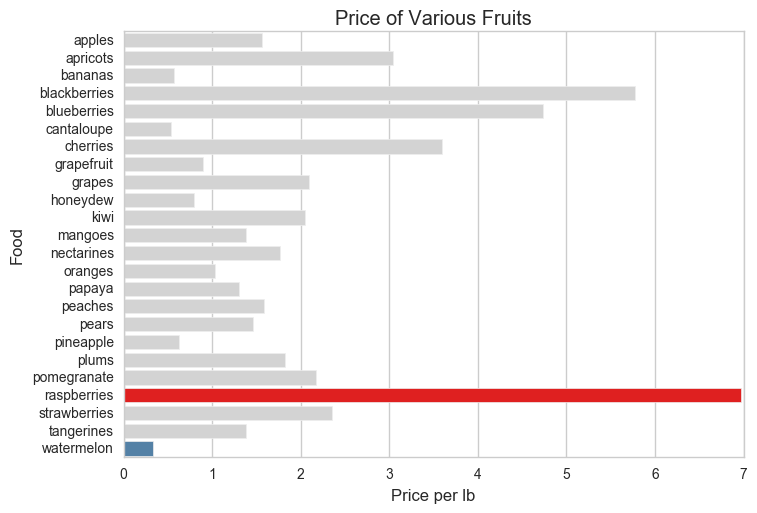

In [18]:
fruits = df_fruit[['food','price_per_lb']]
sns.set_style("whitegrid")

# highlight the lowest price and the highest price
clrs = ['red' if (x == max(fruits['price_per_lb'])) else 
        ('lightgrey' if (x > min(fruits['price_per_lb'])) else 'steelblue') 
        for x in fruits['price_per_lb']]
food_price = sns.barplot(y="food", x="price_per_lb", data=fruits, palette = clrs)

food_price.set(ylabel='Food', xlabel='Price per lb')
plt.title('Price of Various Fruits')
plt.show()

The price of each fruit is shown in the figure above. The highest and lowest price are colored by red and blue, spectively. So __Raspberries__ are the most expensive (per pound). __Watermelons__ are the least expensive.

__Question:__ How do the price distributions compare for fruit and vegetables?

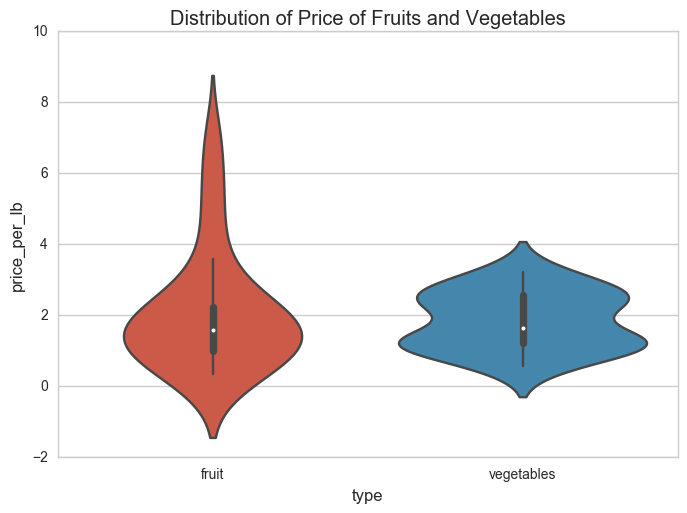

In [19]:
sns.set_style("whitegrid")
ax = sns.violinplot(x="type", y="price_per_lb", data=df_fruit_vg)
plt.title("Distribution of Price of Fruits and Vegetables")
plt.show()

The distribution of price in terms of "price per lb" of fruits and vergetables are shown in the figure above. It can be seen that the price of vegetables has a narrower distribution comparing with fruits. There are three fruits whose prices are much higher than most of the fruits, seen from the figure below.

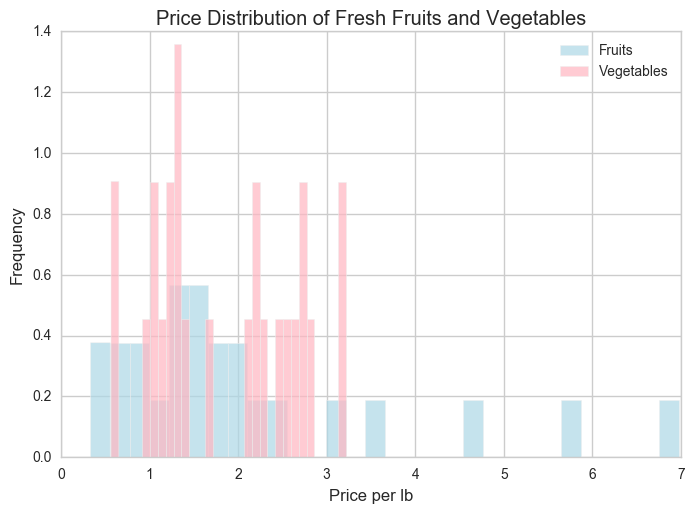

In [20]:
plt.hist(df_fruit['price_per_lb'],label='Fruits',alpha=0.7,bins=30,color='lightblue',normed=1)
plt.hist(df_vg_new['price_per_lb'],label='Vegetables',alpha=0.7,bins=30,color='lightpink',normed=1)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Price per lb')
plt.title('Price Distribution of Fresh Fruits and Vegetables')
plt.show()

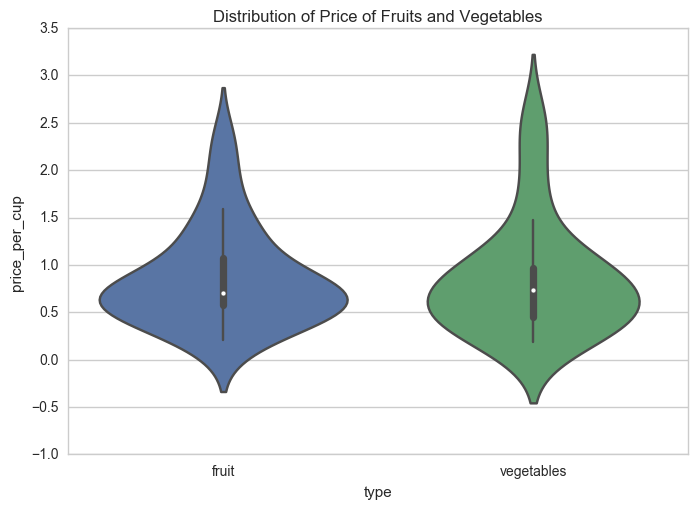

In [26]:
sns.set_style("whitegrid")
ax = sns.violinplot(x="type", y="price_per_cup", data=df_fruit_vg)
plt.title("Distribution of Price of Fruits and Vegetables")
plt.show()

The distribution of price in terms of "Price per Cup" of fruits and vergetables are pretty similar to each other. Expect that, the mode of fruit is slightly higher than that of vegetables.

__Question:__ Which foods are the best value for the price?

__Approach 1__
<p>Here, since there is no pricise definition of "Best Value", I check each category seperately and see which food ranked top among all categories. So I plotted three values in the data frame, "price per lb", "price per cup" and "yield". And all these value are relative value, which means the value are divided by the largest value within each category. Because I want to see the rank of each food.</p>

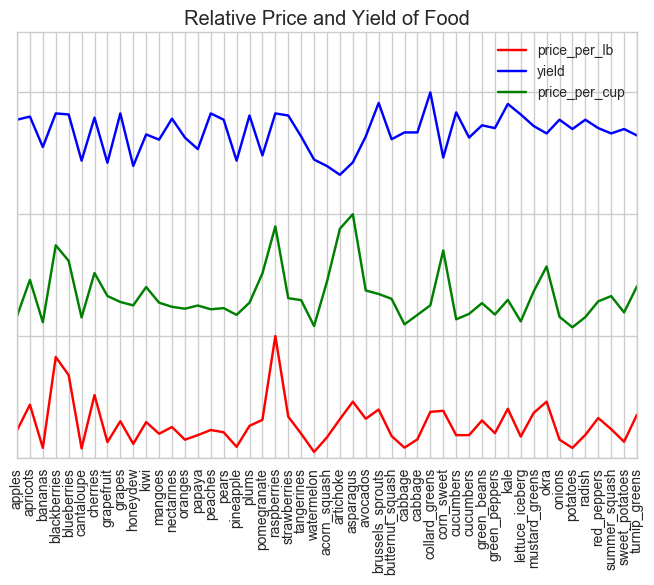

In [22]:
plt.plot(range(len(df_fruit_vg)),df_fruit_vg['price_per_lb']/max(df_fruit_vg['price_per_lb']),'r', label='price_per_lb') 
plt.xticks(range(len(df_fruit_vg)), df_fruit_vg['food'], rotation='vertical')
plt.yticks(range(4), '') # remove y tick label
plt.plot(range(len(df_fruit_vg)),2+df_fruit_vg['yield']/max(df_fruit_vg['yield']),'b',label='yield')
plt.plot(range(len(df_fruit_vg)),1+df_fruit_vg['price_per_cup']/max(df_fruit_vg['price_per_cup']),'g',label='price_per_cup')
plt.title("Relative Price and Yield of Food")
plt.ylim(0, 3.5)
plt.legend()
plt.show()

<p>The figure above shows the relative price and yield of each food. By relative, it means that every price or yield of the food has been divided by the max value of that category. So the trend of price or yield of each food can be seen from the figure.</p>
<p>First, from the two price curve, it can be observed that although in different unit, the price trend is similar to each other, with __raspberries__ highest price. Second, from the blue "yield" curve, it can be seen that, the fluctation of yield is not as large as the fluctuation in price. The highest yield goes to __collard greens__, however, the price of which is not very high. So considering all these three categories, I think __raspberries__ have the highest value, because it has highest price per unit and high yield.</p>

__Approach 2__
<p> Define "value" as the product of "price per lb" times "yield".</p>

In [23]:
df_value = pd.DataFrame() 
df_value['value'] = df_fruit_vg['price_per_lb']*df_fruit_vg['yield']
df_value['food'] = df_fruit_vg['food']

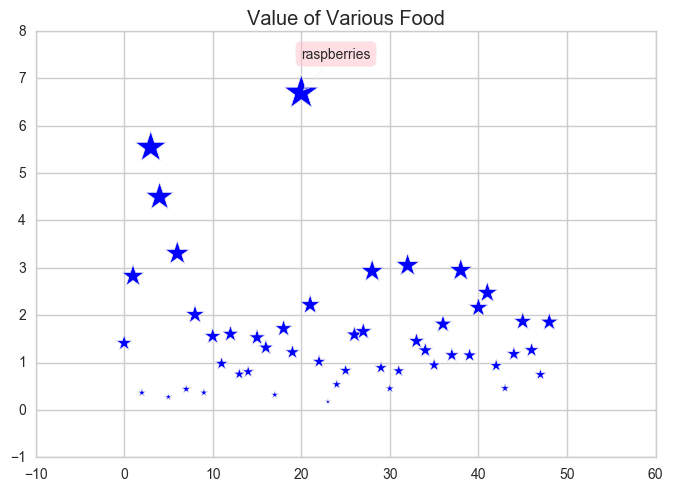

In [24]:
plt.scatter(range(len(df_value)), df_value['value'], marker='*', s = df_value['value']*100)
# labele the highest value point
plt.annotate(
    df_value['food'][df_value['value'] == max(df_value['value'])].item(),
    xy=(df_value['food'][df_value['value'] == max(df_value['value'])].index[0], max(df_value['value'])), 
    xytext=(0, 25), textcoords='offset points', bbox=dict(boxstyle='round,pad=0.4', fc='pink', alpha=0.5),
    arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.title("Value of Various Food")
plt.show()

__Question:__ What's something surprising about this data set?

From the name of each column, it seems that "lb_per_cup" times "price_per_lb" should equal to "price_per_cup". Let's check this.

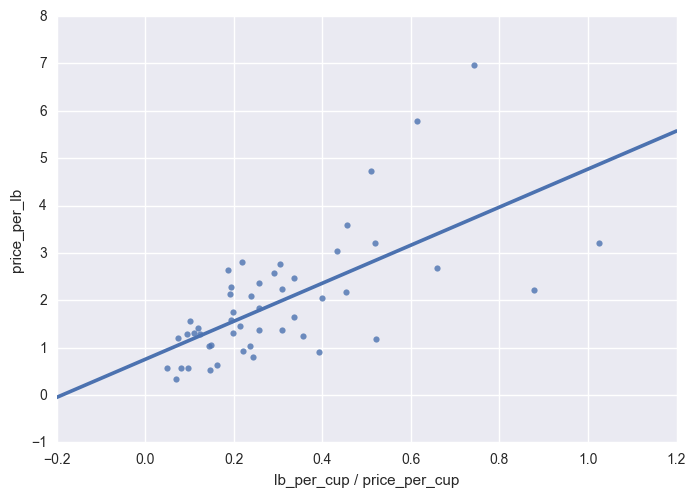

In [25]:
sns.set(color_codes=True)
df_fruit_vg["lb_per_cup / price_per_cup"] = df_fruit_vg["lb_per_cup"]*df_fruit_vg["price_per_cup"]
ax = sns.regplot(x="lb_per_cup / price_per_cup", y="price_per_lb", data=df_fruit_vg, ci=None)
plt.show()

However, from the plot above, it seems that "price_per_cup" cannot be simply calculated from "price_per_lb" times "lb_per_cup". This may be due to that different food may need different special process for putting them into cup and the price varies for the processing.

__Question: __Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

I guess it is __raspberry__. Because it has highest price per lb and very high yield. And to my knowledge, it is very healthy.